In [2]:
!pip install tensorflow --upgrade

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #optimizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-18 07:10:26.632596: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 07:10:27.228945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 07:10:27.229041: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /op

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [5]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


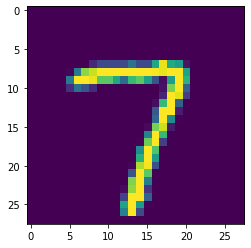

In [6]:
plt.imshow(x_train[5100]) 

In [7]:
np.argmax(y_train[5100])

0

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [9]:
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN

In [10]:
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

2022-11-18 07:10:29.258073: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 07:10:29.258106: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


Compiling the Model

In [11]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the Model

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.2725 - accuracy: 0.9509 - val_loss: 0.1007 - val_accuracy: 0.9669
Epoch 2/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0687 - accuracy: 0.9791 - val_loss: 0.1222 - val_accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0957 - val_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.1042 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.1162 - val_accuracy: 0.9767


Observing the matrics

In [13]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11618799716234207, 0.9767000079154968]


Test the model

In [14]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 70ms/step
[[3.97253099e-14 4.53489487e-18 1.83314680e-15 3.54266859e-07
  2.22696326e-04 4.15413297e-07 1.14624295e-17 1.96542285e-08
  7.93792196e-07 9.99775708e-01]]


In [15]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [16]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [17]:
# Save the model
model.save('mnistCNN.h5')

In [18]:
cd models

[Errno 2] No such file or directory: 'models'
/home/wsuser/work


In [19]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [20]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [21]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.7 MB/s eta 0:00:01


Cloud Deploy

In [22]:
!pip install ibm_watson_machine_learning

In [23]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "hc-Fj_QIlEqjHeuU3lCR5ovw4SrIr5I-AgAB9XOntOCI"
}
client = APIClient(wml_credentials)

In [24]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [25]:
space_uid=guid_from_space_name(client,'ImageClassification')
print("Space UID = "+space_uid)

StopIteration: 

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.repository.download('81900656-bdb2-4bdf-a1ad-2caa9058565a', "digit-rec-model_download.tgz")